# ARIMA - Forecast - Phase - IV

In [170]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

df_combined_new = pd.read_csv("../../data/baseline_training_food_page1.csv")
df_combined_new.head()

,date,items,pettah_average,pettah_min_value,pettah_max_value,food_inflation_Base_2013,percipitation,Bankrupt,pettah_range,pettah_midpoint
0,6/22/2015,Pulses (Rs/Kg)_Green Gram,194.6,190.0,200,110.2,1.12,0,10.0,195.0
1,6/22/2015,Pulses (Rs/Kg)_Red Dhal,177.6,168.0,186,110.2,1.12,0,18.0,177.0
2,6/22/2015,Potatoes (Rs/Kg)_Nuwaraeliya,134.0,130.0,140,110.2,1.12,0,10.0,135.0
3,6/22/2015,Onion (Rs/Kg)_Vedalan,134.0,130.0,140,110.2,1.12,0,10.0,135.0
4,6/22/2015,Pulses (Rs/Kg)_Cowpea,202.0,180.0,210,110.2,1.12,0,30.0,195.0


## Train and Test Set Date Range ( 2019-05-31 ---- 2024-05-31)

In [171]:
import pandas as pd

# date column in datetime format
df_combined_new['date'] = pd.to_datetime(df_combined_new['date'])
# Filter the DataFrame
filtered_df = df_combined_new[
    (df_combined_new['items'] == "Rice (Rs/kg)_Nadu 2") &
    (df_combined_new['date'] >= '2019-05-31') &
    (df_combined_new['date'] <= '2024-05-31')
]
filtered_df.head()

,date,items,pettah_average,pettah_min_value,pettah_max_value,food_inflation_Base_2013,percipitation,Bankrupt,pettah_range,pettah_midpoint
8525,2019-05-31,Rice (Rs/kg)_Nadu 2,84.0,83.0,85,131.1,0.84,0,2.0,84.0
8534,2019-06-03,Rice (Rs/kg)_Nadu 2,84.0,83.0,85,134.5,9.28,0,2.0,84.0
8541,2019-06-06,Rice (Rs/kg)_Nadu 2,82.0,78.0,83,134.5,4.34,0,5.0,80.5
8550,2019-06-07,Rice (Rs/kg)_Nadu 2,81.0,78.0,84,134.5,19.28,0,6.0,81.0
8560,2019-06-10,Rice (Rs/kg)_Nadu 2,80.8,78.0,83,134.5,6.50,0,5.0,80.5


In [172]:
filtered_df = filtered_df[filtered_df['date'] != '2023-08-16'] # Dropping one outlier

In [173]:
filtered_df.reset_index(drop=True, inplace=True)
filtered_df.head()

,date,items,pettah_average,pettah_min_value,pettah_max_value,food_inflation_Base_2013,percipitation,Bankrupt,pettah_range,pettah_midpoint
0,2019-05-31,Rice (Rs/kg)_Nadu 2,84.0,83.0,85,131.1,0.84,0,2.0,84.0
1,2019-06-03,Rice (Rs/kg)_Nadu 2,84.0,83.0,85,134.5,9.28,0,2.0,84.0
2,2019-06-06,Rice (Rs/kg)_Nadu 2,82.0,78.0,83,134.5,4.34,0,5.0,80.5
3,2019-06-07,Rice (Rs/kg)_Nadu 2,81.0,78.0,84,134.5,19.28,0,6.0,81.0
4,2019-06-10,Rice (Rs/kg)_Nadu 2,80.8,78.0,83,134.5,6.50,0,5.0,80.5


## Drop Duplicates

In [174]:
duplicates = filtered_df[filtered_df['date'].duplicated()]
duplicates

,date,items,pettah_average,pettah_min_value,pettah_max_value,food_inflation_Base_2013,percipitation,Bankrupt,pettah_range,pettah_midpoint
212,2020-07-17,Rice (Rs/kg)_Nadu 2,92.60,92.0,93,148.00,5.89,0,1.0,92.5
508,2022-03-15,Rice (Rs/kg)_Nadu 2,155.00,150.0,160,202.00,0.25,1,10.0,155.0
891,2024-01-03,Rice (Rs/kg)_Nadu 2,205.75,205.0,208,322.27,1.25,1,3.0,206.5


In [175]:
# Keep the first occurrence and drop the rest
filtered_df = filtered_df.drop_duplicates(subset=['date'], keep='first')

In [176]:
filtered_df.reset_index(drop=True, inplace=True)

## Reading Data Set Again from the Excel

In [177]:
filtered_df = pd.read_excel('../../data/Lstm_Dates.xlsx')
# Replace all missing values (NaN) in the 'items' column with 'Rice (Rs/kg)_Nadu 2'
filtered_df['items'] = filtered_df['items'].fillna('Rice (Rs/kg)_Nadu 2')
filtered_df.head(15)

,date,items,pettah_average,pettah_min_value,pettah_max_value,food_inflation_Base_2013,percipitation,Bankrupt,pettah_range,pettah_midpoint
0,2019-05-31,Rice (Rs/kg)_Nadu 2,84.0,83.0,85.0,131.1,0.84,0.0,2.0,84.0
1,2019-06-01,Rice (Rs/kg)_Nadu 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-06-02,Rice (Rs/kg)_Nadu 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-06-03,Rice (Rs/kg)_Nadu 2,84.0,83.0,85.0,134.5,9.28,0.0,2.0,84.0
4,2019-06-04,Rice (Rs/kg)_Nadu 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2019-06-05,Rice (Rs/kg)_Nadu 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2019-06-06,Rice (Rs/kg)_Nadu 2,82.0,78.0,83.0,134.5,4.34,0.0,5.0,80.5
7,2019-06-07,Rice (Rs/kg)_Nadu 2,81.0,78.0,84.0,134.5,19.28,0.0,6.0,81.0
8,2019-06-08,Rice (Rs/kg)_Nadu 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2019-06-09,Rice (Rs/kg)_Nadu 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Feature Engineering and Final Data Frame Creation

## Use Interpolation to Fill Missing Values

In [178]:
# Time-based interpolation (useful for datetime indices)
filtered_df['pettah_average'] = filtered_df['pettah_average'].interpolate(method='linear', limit_direction='both')

## Regime indicator 

In [179]:
# Ensure 'date' column is in datetime format
filtered_df['date'] = pd.to_datetime(filtered_df['date'])

# Set the date column as the index (if not already)
filtered_df.set_index('date', inplace=True)

# Initialize the 'regime' column with default value, assuming 0 for stable period
filtered_df['regime'] = 0

# Assign regime indicator values based on known economic periods
# Stable period: 2019 to the end of 2021
filtered_df.loc[(filtered_df.index >= '2019-01-01') & (filtered_df.index < '2022-01-01'), 'regime'] = 0

# Crisis period: 2022 to mid-2023
filtered_df.loc[(filtered_df.index >= '2022-01-01') & (filtered_df.index < '2023-07-01'), 'regime'] = 1

# Recovery period: mid-2023 onward
filtered_df.loc[filtered_df.index >= '2023-07-01', 'regime'] =2

filtered_df.head()

,items,pettah_average,pettah_min_value,pettah_max_value,food_inflation_Base_2013,percipitation,Bankrupt,pettah_range,pettah_midpoint,regime
date,,,,,,,,,,
2019-05-31,Rice (Rs/kg)_Nadu 2,84.000000,83.0,85.0,131.1,0.84,0.0,2.0,84.0,0
2019-06-01,Rice (Rs/kg)_Nadu 2,84.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2019-06-02,Rice (Rs/kg)_Nadu 2,84.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2019-06-03,Rice (Rs/kg)_Nadu 2,84.000000,83.0,85.0,134.5,9.28,0.0,2.0,84.0,0
2019-06-04,Rice (Rs/kg)_Nadu 2,83.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


## Plotting the Pettah Average Price

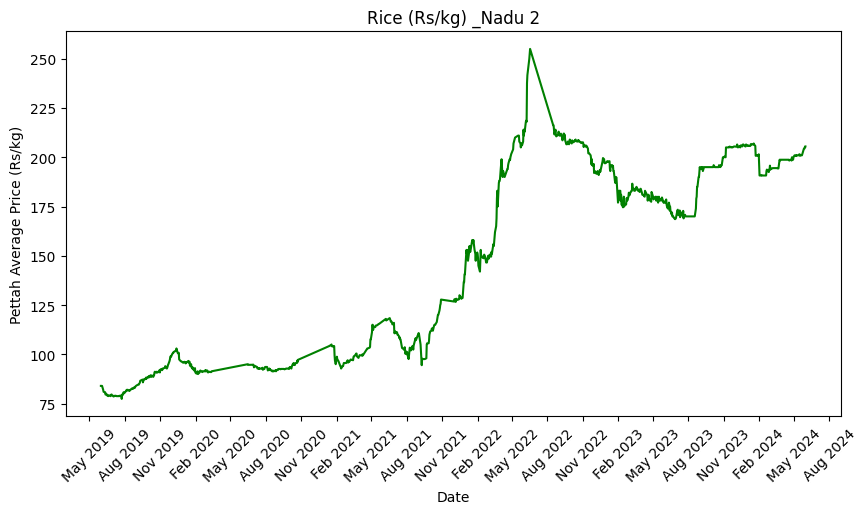

In [180]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Reset the index to make 'date' a regular column
filtered_df = filtered_df.reset_index()
# Ensure 'date' is a datetime object
filtered_df['date'] = pd.to_datetime(filtered_df['date'])

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 5))

# Plot pettah_average over time
sns.lineplot(data=filtered_df, x='date', y='pettah_average', ax=ax, color='green')

# Add titles and labels
ax.set_title('Rice (Rs/kg) _Nadu 2')
ax.set_xlabel('Date')
ax.set_ylabel('Pettah Average Price (Rs/kg)')

# Set x-axis format to show the month and year (e.g., Jan 2024)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Set the interval for x-axis ticks to every 3 months
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))

# Rotate date labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

## Drop Features 

In [181]:
# filtered_df.drop(columns=['items','percipitation', 'pettah_min_value', 'pettah_max_value', 'food_inflation_Base_2013', 'Bankrupt',
#                           'percipitation','pettah_range','pettah_midpoint','pettah_avg_sma_150','pettah_avg_sma_14','ema_7','ema_30'], inplace=True)

filtered_df.drop(columns=['items', 'pettah_min_value',
       'pettah_max_value', 'food_inflation_Base_2013', 'percipitation',
       'Bankrupt', 'pettah_range', 'pettah_midpoint', 'regime'], inplace=True)


In [182]:
print(filtered_df.columns)

Index(['date', 'pettah_average'], dtype='object')


## Time Series Decomposition - Additive Model

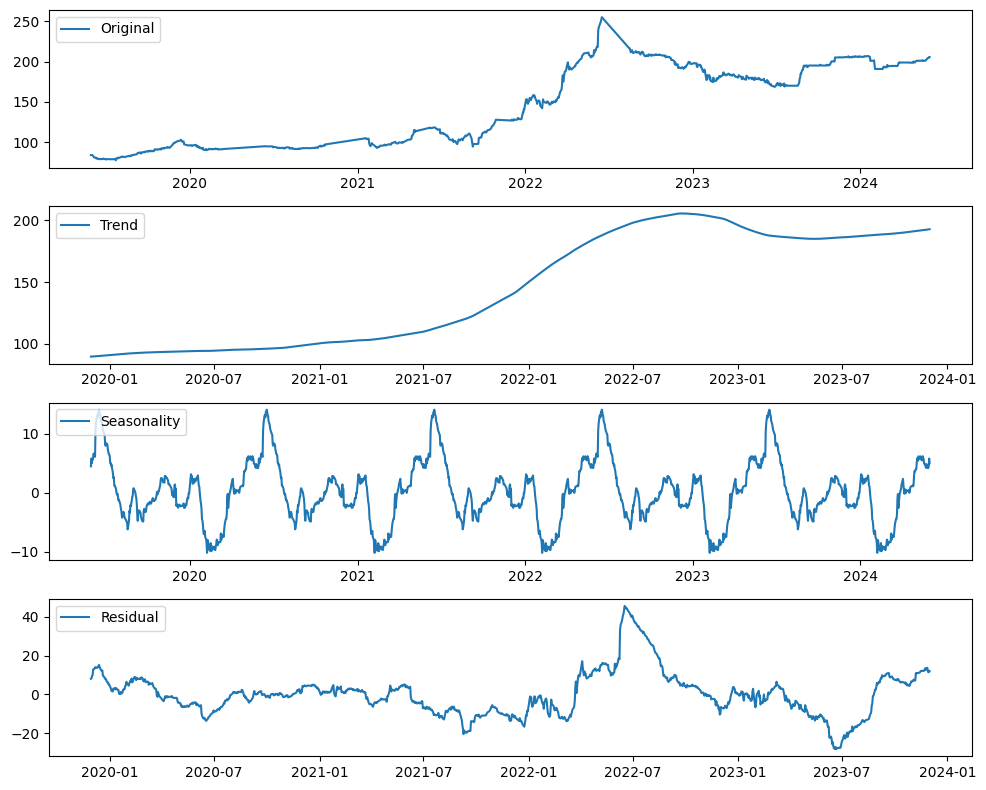

In [183]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

filtered_df['date'] = pd.to_datetime(filtered_df['date'])
filtered_df.set_index('date', inplace=True)

# Perform seasonal decomposition (additive model is often used for price data)
decomposition = seasonal_decompose(filtered_df['pettah_average'], model='additive', period=365)

# Plot the decomposed components
plt.figure(figsize=(10, 8))
plt.subplot(4, 1, 1)
plt.plot(filtered_df['pettah_average'], label='Original')
plt.legend(loc='upper left')

plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='upper left')

plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


## Check the Stationary - d ?

In [184]:
from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey-Fuller test on the specific column (replace 'price_column' with your column name)
adf_result = adfuller(filtered_df['pettah_average'])

# Print the results
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
print("Critical Values:")
for key, value in adf_result[4].items():
    print(f"   {key}: {value}")


ADF Statistic: -0.8983795349097404
p-value: 0.7885055916557444
Critical Values:
   1%: -3.433966009459769
   5%: -2.8631372667825503
   10%: -2.567620331903232



### Non-Stationary Time Series

A time series is non-stationary if its statistical properties change over time. In other words, a non-stationary series may have:

- Trends: The mean of the series may increase or decrease over time.
- Changing Variance: The spread around the mean may increase or decrease over time.
- Seasonality: The series may show repeating patterns or cycles at regular intervals.
- Autocovariance Depends on Time: The covariance between points can change depending on the specific time period.

## ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) plots - Determine P and Q

### Note 
- 1 ACF Plot: Helps in determining q (the order of the moving average).
- 2 PACF Plot: Helps in determining p (the order of the autoregressive model).

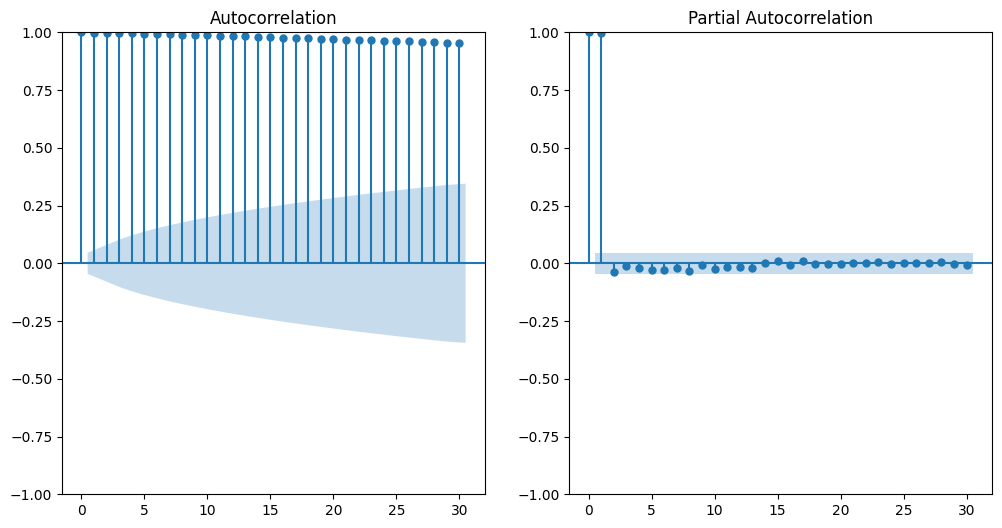

In [185]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot ACF and PACF for the differenced series
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(filtered_df['pettah_average'].dropna(), lags=30, ax=plt.gca())
plt.subplot(122)
plot_pacf(filtered_df['pettah_average'].dropna(), lags=30, ax=plt.gca())
plt.show()

## AIC for Model Selection

In [186]:
import warnings
from statsmodels.tsa.arima.model import ARIMA

warnings.filterwarnings("ignore")  # Ignore warnings for cleaner output

# Example of trying multiple values of p, d, and q and comparing AIC
aic_values = []
pdq_combinations = [(p, d, q) for p in range(3) for d in range(2) for q in range(3)]

for pdq in pdq_combinations:
    try:
        model = ARIMA(filtered_df['pettah_average'], order=pdq)
        result = model.fit()
        aic_values.append((pdq, result.aic))
    except:
        continue

# Find the best combination
best_combination = min(aic_values, key=lambda x: x[1])
print(f"Best combination (p, d, q) with lowest AIC: {best_combination[0]}, AIC: {best_combination[1]}")

Best combination (p, d, q) with lowest AIC: (2, 1, 2), AIC: 5603.018893972745


## Data Transformation

### Box - Cox Transform

In [187]:
from scipy.stats import boxcox

# Apply Box-Cox Transformation
filtered_df['pettah_average'], lambda_value = boxcox(filtered_df['pettah_average'])

# Print the lambda used for the transformation
print(f"Lambda value: {lambda_value}")

Lambda value: -0.1207758043220706


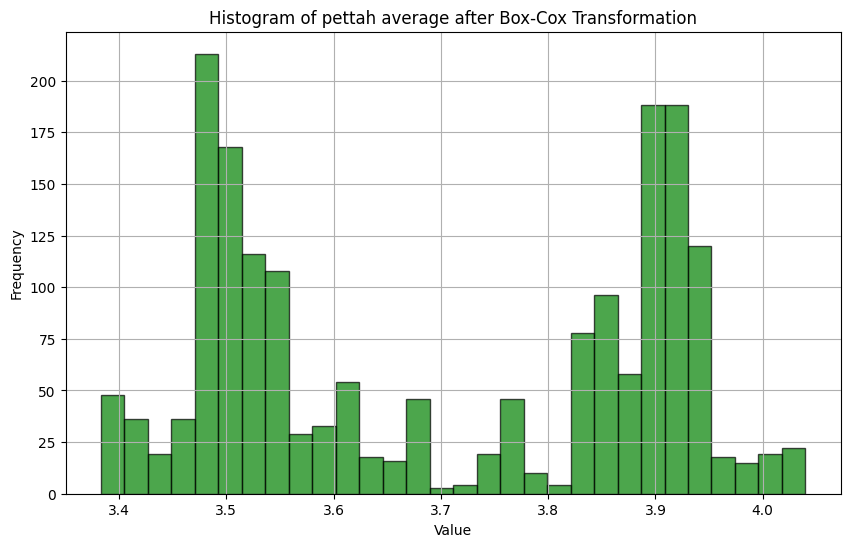

In [188]:
plt.figure(figsize=(10, 6))  # Optional: set the figure size
plt.hist(filtered_df['pettah_average'], bins=30, alpha=0.7, color='g', edgecolor='black')
plt.title('Histogram of pettah average after Box-Cox Transformation')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)  # Optional: Add a grid
plt.show()

## Check Stationary Result after Box-Cox

In [189]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(filtered_df['pettah_average'])

# Print the results of the ADF test
print("ADF Statistic (after Box-Cox):", adf_result[0])
print("p-value (after Box-Cox):", adf_result[1])
print("Critical Values:")
for key, value in adf_result[4].items():
    print(f"   {key}: {value}")

ADF Statistic (after Box-Cox): -1.1019282396966856
p-value (after Box-Cox): 0.714302333162473
Critical Values:
   1%: -3.433966009459769
   5%: -2.8631372667825503
   10%: -2.567620331903232


## Data Scaling

### Min-Max Scaling

In [190]:
from sklearn.preprocessing import MinMaxScaler

# # convert date column to index
# filtered_df.set_index('date', inplace=True)

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(filtered_df)

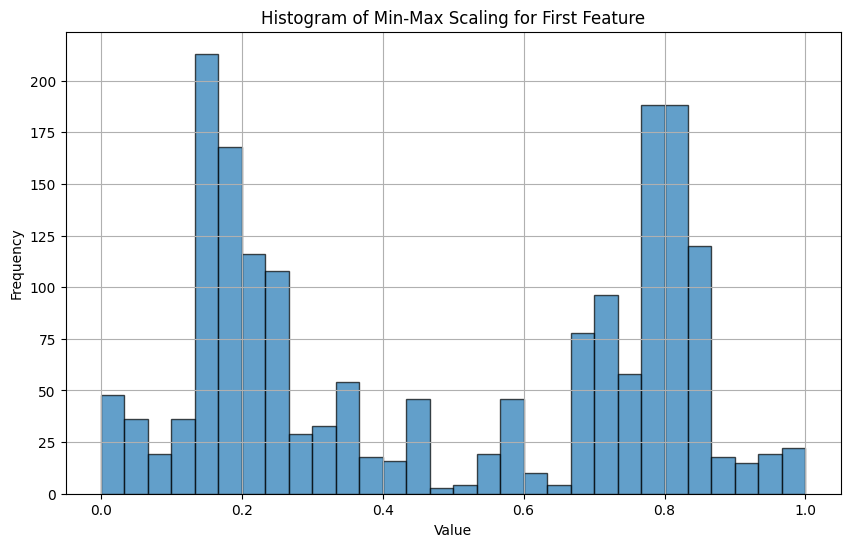

In [191]:
import matplotlib.pyplot as plt

# Plot histogram for the first feature only
plt.figure(figsize=(10, 6))
plt.hist(scaled_data[:, 0], bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of Min-Max Scaling for First Feature')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


## Remove the Zero Values in the Scaled_df

In [192]:
# Identify rows that have any '0' values
rows_with_zeros = (scaled_data == 0).any(axis=1)

# Filter out those rows (keep only rows without '0' values)
scaled_data = scaled_data[~rows_with_zeros]

## Train / Test Split 

In [193]:
# Assuming 'filtered_df' is your cleaned and prepared DataFrame with 'pettah_average' as the target column
train_size = int(0.8 * len(scaled_data))
train_data, test_data = filtered_df['pettah_average'][:train_size], filtered_df['pettah_average'][train_size:]


## Train the Autoregressive Integrated Moving Average Model - ARIMA

In [194]:
# Fit ARIMA model on training data
# Replace p, d, q with suitable values for your data (try (5, 1, 0) or tune them with AIC)
model = ARIMA(train_data, order=(5, 1, 0))  # Example order
arima_result = model.fit()


## Forecast Horizon 7-Days

In [195]:
forecast_horizon = 7  # Number of days to forecast

# Forecast for 7 days
forecast = arima_result.forecast(steps=forecast_horizon)
forecast_dates = test_data.index[:forecast_horizon]  # Adjust dates for plotting

print("Forecasted Prices:", forecast)


Forecasted Prices: 2023-05-31    3.850313
2023-06-01    3.850075
2023-06-02    3.849870
2023-06-03    3.849784
2023-06-04    3.849869
2023-06-05    3.849851
2023-06-06    3.849823
Freq: D, Name: predicted_mean, dtype: float64


## Evaluate Model Performances 

In [196]:
# Actual prices for the 7-day forecast horizon
actual_prices = test_data[:forecast_horizon]

# Calculate evaluation metrics
mae = mean_absolute_error(actual_prices, forecast)
mse = mean_squared_error(actual_prices, forecast)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Absolute Error (MAE): 0.002089008951864178
Mean Squared Error (MSE): 5.909015562036747e-06
Root Mean Squared Error (RMSE): 0.0024308466759622553


## Predictions vs Actuals

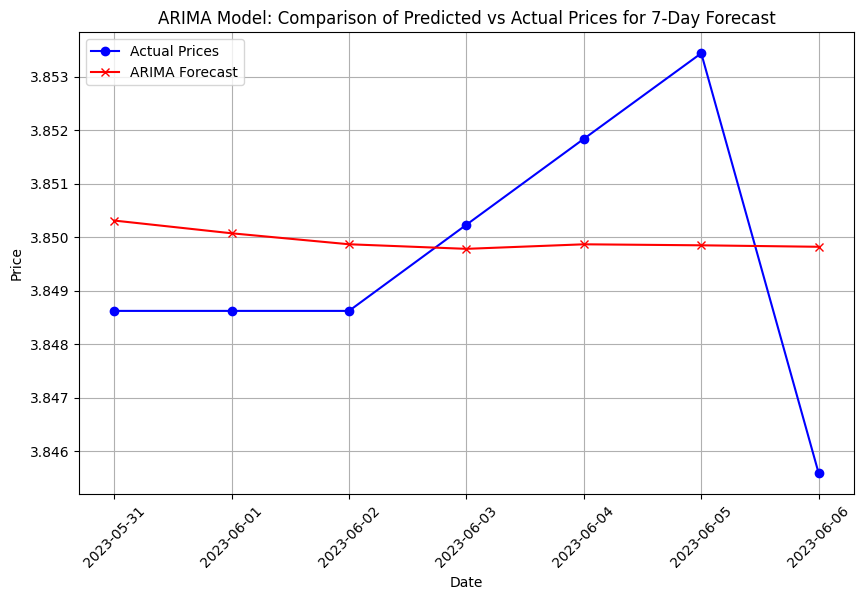

In [197]:
plt.figure(figsize=(10, 6))
plt.plot(forecast_dates, actual_prices, label='Actual Prices', marker='o', color='blue')
plt.plot(forecast_dates, forecast, label='ARIMA Forecast', marker='x', color='red')
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("ARIMA Model: Comparison of Predicted vs Actual Prices for 7-Day Forecast")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


## Error Analysis on long Forecasts like 30 days

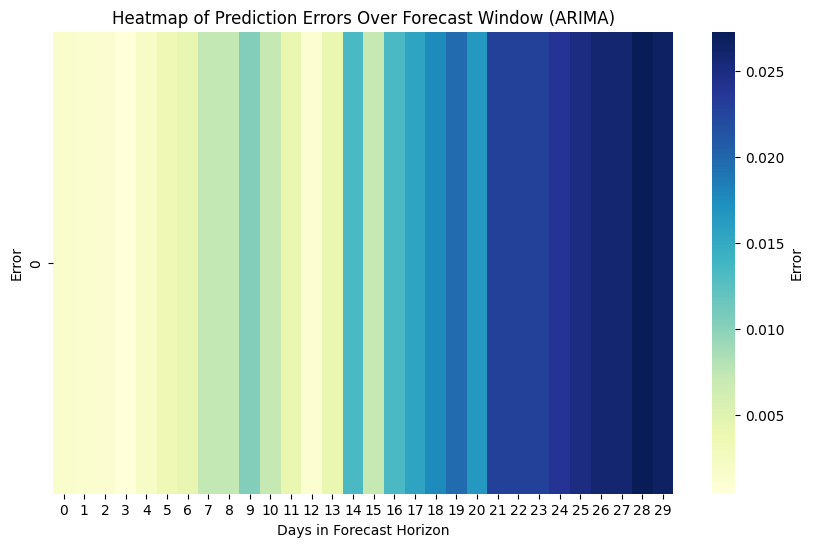

In [198]:
# Extended forecast (e.g., for 30 days)
extended_forecast_horizon = 30
extended_forecast = arima_result.forecast(steps=extended_forecast_horizon)
extended_actual_prices = test_data[:extended_forecast_horizon]

# Plot heatmap of errors for extended forecast
errors = np.abs(extended_actual_prices.values - extended_forecast)

plt.figure(figsize=(10, 6))
sns.heatmap([errors], cmap="YlGnBu", annot=False, cbar_kws={'label': 'Error'})
plt.xlabel("Days in Forecast Horizon")
plt.ylabel("Error")
plt.title("Heatmap of Prediction Errors Over Forecast Window (ARIMA)")
plt.show()
